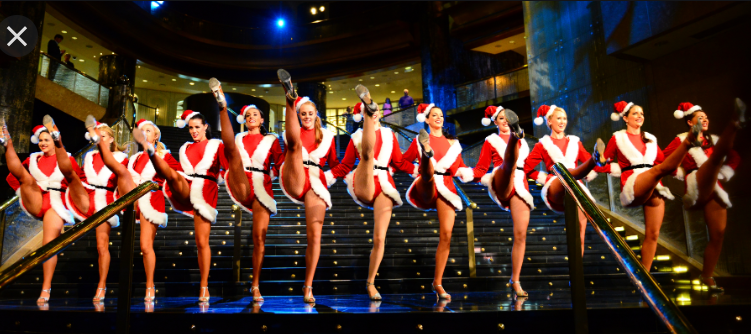

## Disclaimer! This kernel is only for educational purposes and made for fun therefor the content of the kernel should not be taken seriously. 

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Data importering

In [ ]:
import pandas as pd
datafile = pd.read_csv("../input/forest-fires-in-india/datafile.csv")

# Data visualisering

In [ ]:
datafile.head()

In [ ]:
datafile.isnull().sum()

In [ ]:
import missingno as msno
msno.matrix(datafile)

The above figure is all black becouse there are no missing values, if there where any missing values or nan-values there would be white lines in the boxes, under each columns.

In [ ]:
datafile.describe()

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

In [ ]:
datafile.columns

In [ ]:
Line_Charts = datafile.copy()
Line_Charts = Line_Charts.drop(['States/UTs'], axis = 1)


plt.figure(figsize=(14,6))

# Add title
title_obj=plt.title("Indian reinforest data for fire in different places")
plt.setp(title_obj, color='g') 

sns.lineplot(data = Line_Charts)

As you can see above, the line of code is relatively short and has two main components:

sns.lineplot tells the notebook that we want to create a line chart.
Every command that you learn about in this course will start with sns, which indicates that the command comes from the seaborn package. For instance, we use sns.lineplot to make line charts. Soon, you'll learn that we use sns.barplot and sns.heatmap to make bar charts and heatmaps, respectively.
data=spotify_data selects the data that will be used to create the chart.
Note that you will always use this same format when you create a line chart, and the only thing that changes with a new dataset is the name of the dataset. So, if you were working with a different dataset named financial_data, for instance, the line of code would appear as follows:

sns.lineplot(data=financial_data)
Sometimes there are additional details we'd like to modify, like the size of the figure and the title of the chart. Each of these options can easily be set with a single line of code.

--------- from Alexis Cook in Data Visualization

In [ ]:
plt.figure(figsize=(10,6))

# Add title
title_obj=plt.title("Average fire in indian forest from dataset, by year")
plt.setp(title_obj, color='g') 
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=datafile.index, y=datafile['States/UTs'])

# Add label for vertical axis
title_obj1=plt.ylabel("Forest areas in indian")
plt.setp(title_obj1, color='g') 
print('To see the forest areas in plot, change the kernel theme to light!')

# Data cleaning

In [ ]:
from sklearn.model_selection import train_test_split


# Read the data
X = datafile.copy()
X_test_full = datafile.copy()
test = datafile.copy()

# Remove rows with missing target, separate target from predictors
# X.dropna(axis=0, subset=['States/UTs'], inplace=True)
y = X['States/UTs']              
X.drop(['States/UTs'], axis=1)
#Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Low cardinality means that the column contains a lot of “repeats” in its data range.
# Examples of categorical variables are race, sex, age group, and educational level. 
# While the latter two variables may also be considered in a numerical manner by using exact values for age 
# and highest grade completed
# nunique() function to find the number of unique values over the column axis. So when it finds over 10 uniqe 
# values and the cname is a 
# dtype 'object' which means Data type objects are useful for creating structured arrays. 
# A structured array is the one which contains different types of data.

### one line meaning of above####
## for cname in a dataframes column shall return a value to 'low_cardinality_cols' if there are more then 10 uniqe values
## and the dtype shall be a object which is a structured array that can have different types of data (lik; int, float string ect.)
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

### for cname (every value, one at the time) in dataframe for columns return a value to 'numeric_cols' if the 
### dtype= int64 or float64.

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


## One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
    #y_train = pd.get_dummies(y_train)
    #y_valid = pd.get_dummies(y_valid)
X_test = pd.get_dummies(X_test)

X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
#aligns them so that the two dataframes have the same row and/or column configuration.

# One hot encodning

In [ ]:
y_dummies = pd.get_dummies(y_train)
y_dummies.head()

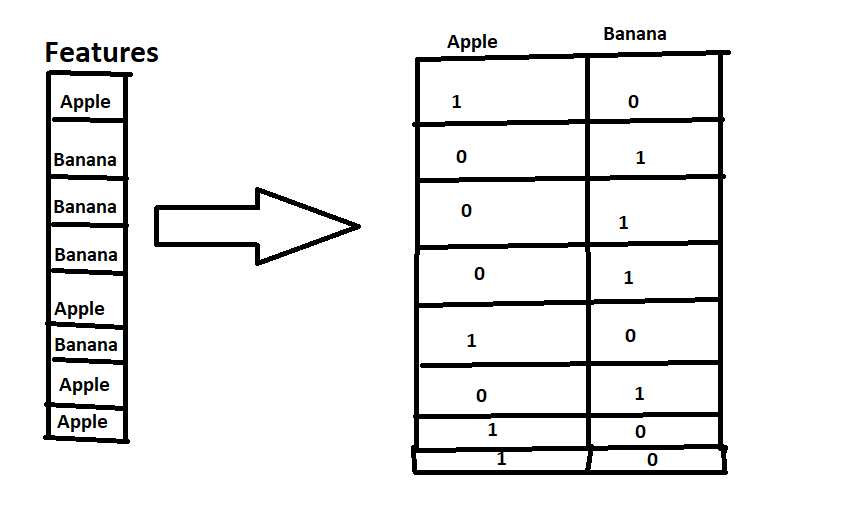


One_hot-kodning gør det muligt for ud at omdanne nominelle kategoriske data til funktioner med numercale værdier, mens de ikke matematisk indebærer nogen ordinal realisering mellem klasserne.

# Model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBRegressor


model2 = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1)
model = GradientBoostingClassifier(random_state=1)
model3 = DecisionTreeClassifier(max_depth=3, random_state=1)
#model=SGDClassifier(random_state=1)
#model=ExtraTreesClassifier(random_state=1)
#model = XGBRegressor()
# Define the models
model_1 = RandomForestClassifier(n_estimators=50, random_state=0)
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_3 = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
model_4 = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=1)



model.fit(X_train, y_train)
y_predictions = model.predict(X_valid)

print('model accuracy score',model.score(X_valid, y_predictions))

## Theory

### DecisionTreeClassifier

Et beslutningstræ er en flowdiagram-lignende trestruktur, hvor en intern knude repræsenterer funktion (eller attribut), grenen repræsenterer en beslutningsregel, og hver bladknude repræsenterer resultatet. Den øverste knude i et beslutningstræ kaldes rodnoden. Den lærer at partitionere på grundlag af attributværdien. Det partitionerer træet på rekursivt vis kalder rekursivt partitionering. Denne flowchart-lignende struktur hjælper dig i beslutningsprocessen.

Maximal dybde af et træ: Træets maksimale dybde. Hvis ingen, udvides nodes, indtil alle bladene indeholder mindre end min_samples_split-prøver. Den højere værdi af maksimal dybde forårsager overfitting, og en lavere værdi forårsager underfitting

 ### RandomForestClassifier

Random Forest er en ensemble-indlæringsmetode til klassificering, regression og andre opgaver, der fungerer ved at konstruere et væld af beslutningstræer på træningstidspunktet og udsende den klasse, der er tilstanden for klasserne (Classifier) eller middel forudsigelse (regression) af de enkelte træer. RandomForestClassifier er korrekte for DecisionTree vane med at overfitting til træningssættet

### GradientBoostingClassifie

Gradient boosting is an algoritme that boost the produces a prediction model in the form of an ensemble of weak prediction moldels. It happens by building the model in en a stage-wise fashion and then i gernalizes them by allowing optimization of an arbitrary differentiable loos function 

### XGBRegressor

Denne XGBoost er et bibliotek til udvikling af hurtige og højtydende gradientforstærkende træmodeller.
At XGBoost opnår den bedste ydelse på en række vanskelige maskinlæringsopgaver.

# Predictions

In [ ]:
model2.fit(X_train, y_train)
print('model1 accuracy score',model2.score(X_valid,y_predictions))
model.fit(X_train, y_train)
print('model1 accuracy score',model.score(X_valid,y_predictions))
model3.fit(X_train, y_train)
print('model1 accuracy score',model3.score(X_valid,y_predictions))

In [ ]:
model_1.fit(X_train, y_train)
print('model1 accuracy score',model_1.score(X_valid,y_predictions))
model_2.fit(X_train, y_train)
print('model2 accuracy score',model_2.score(X_valid,y_predictions))
model_3.fit(X_train, y_train)
print('model3 accuracy score',model_3.score(X_valid,y_predictions))
model_4.fit(X_train, y_train)
print('model4 accuracy score',model_4.score(X_valid,y_predictions))